In [1]:
import numpy as np
import langdetect
#import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
import utils
from utils import *

#Reading Data
df = pd.read_csv('ratings.csv', lineterminator='\n')
df.head()

,Name,Date,Rating,Review
0,Nowayback_,"Dec 12, 2020",1.0,"""We care about our games"" ""Next-Generation of..."
1,MADCRACK,"Dec 12, 2020",2.0,This game is 90% marketing. They used all the...
2,Senock,"Dec 16, 2020",10.0,Bien ya son muchas horas jugadas y siendo la ...
3,Nijkerk,"Dec 12, 2020",0.0,This game isnt even close to being finished. ...
4,GenoyTexy,"Dec 12, 2020",0.0,I’ve seen better AI in GTA 3. The cops spawn ...


In [2]:
df = df[['Rating', "Review"]]
df.head()

,Rating,Review
0,1.0,"""We care about our games"" ""Next-Generation of..."
1,2.0,This game is 90% marketing. They used all the...
2,10.0,Bien ya son muchas horas jugadas y siendo la ...
3,0.0,This game isnt even close to being finished. ...
4,0.0,I’ve seen better AI in GTA 3. The cops spawn ...


In [3]:
# Split data by reviews types
print(f'Positive >= 7: {len(df.loc[df["Rating"] >= 7])}')
print(f'Negative <= 5: {len(df.loc[df["Rating"] <= 5])}')
print(f'5 < Neutral < 7: {len(df.loc[(df["Rating"] > 5) & (df["Rating"] < 7)])}')

Positive >= 7: 2869
Negative <= 5: 1716
5 < Neutral < 7: 115


In [4]:
#Excluding big reviews (more than 3.000 char)
long_reviews = df.loc[df['Review'].str.len() > 3000].index
df.drop(long_reviews, inplace=True)
print(len(df.loc[df["Rating"] < 100]))

4565


2        Bien ya son muchas horas jugadas y siendo la ...
21       I enjoyed the game, but it shouldn't have bee...
61       Best game of this decade. Sprawling, captivat...
81       ZERO bugs encountered in over 20 hours of gam...
106      The game is far from being bad, it's actually...
                              ...                        
4689     As of right now the open world needs polishin...
4695     Great game so far! I just beat the game as a ...
4696     A lot of bugs, but very integesting main stor...
4697     This game is great on a system that can run i...
4698     Playing on XSX, the game is great. The bugs a...
Name: Review, Length: 2791, dtype: object
('game', 4646)
('bugs', 1169)
('story', 963)
('like', 936)
('good', 725)
('game.', 695)
('best', 615)
('world', 612)
('great', 604)
('play', 550)
('hours', 497)
('game,', 496)
('PC', 492)
('people', 475)
('played', 470)
('lot', 464)
("I'm", 456)
('playing', 456)
('games', 448)
('Cyberpunk', 394)
('bugs,', 381)
("don't"

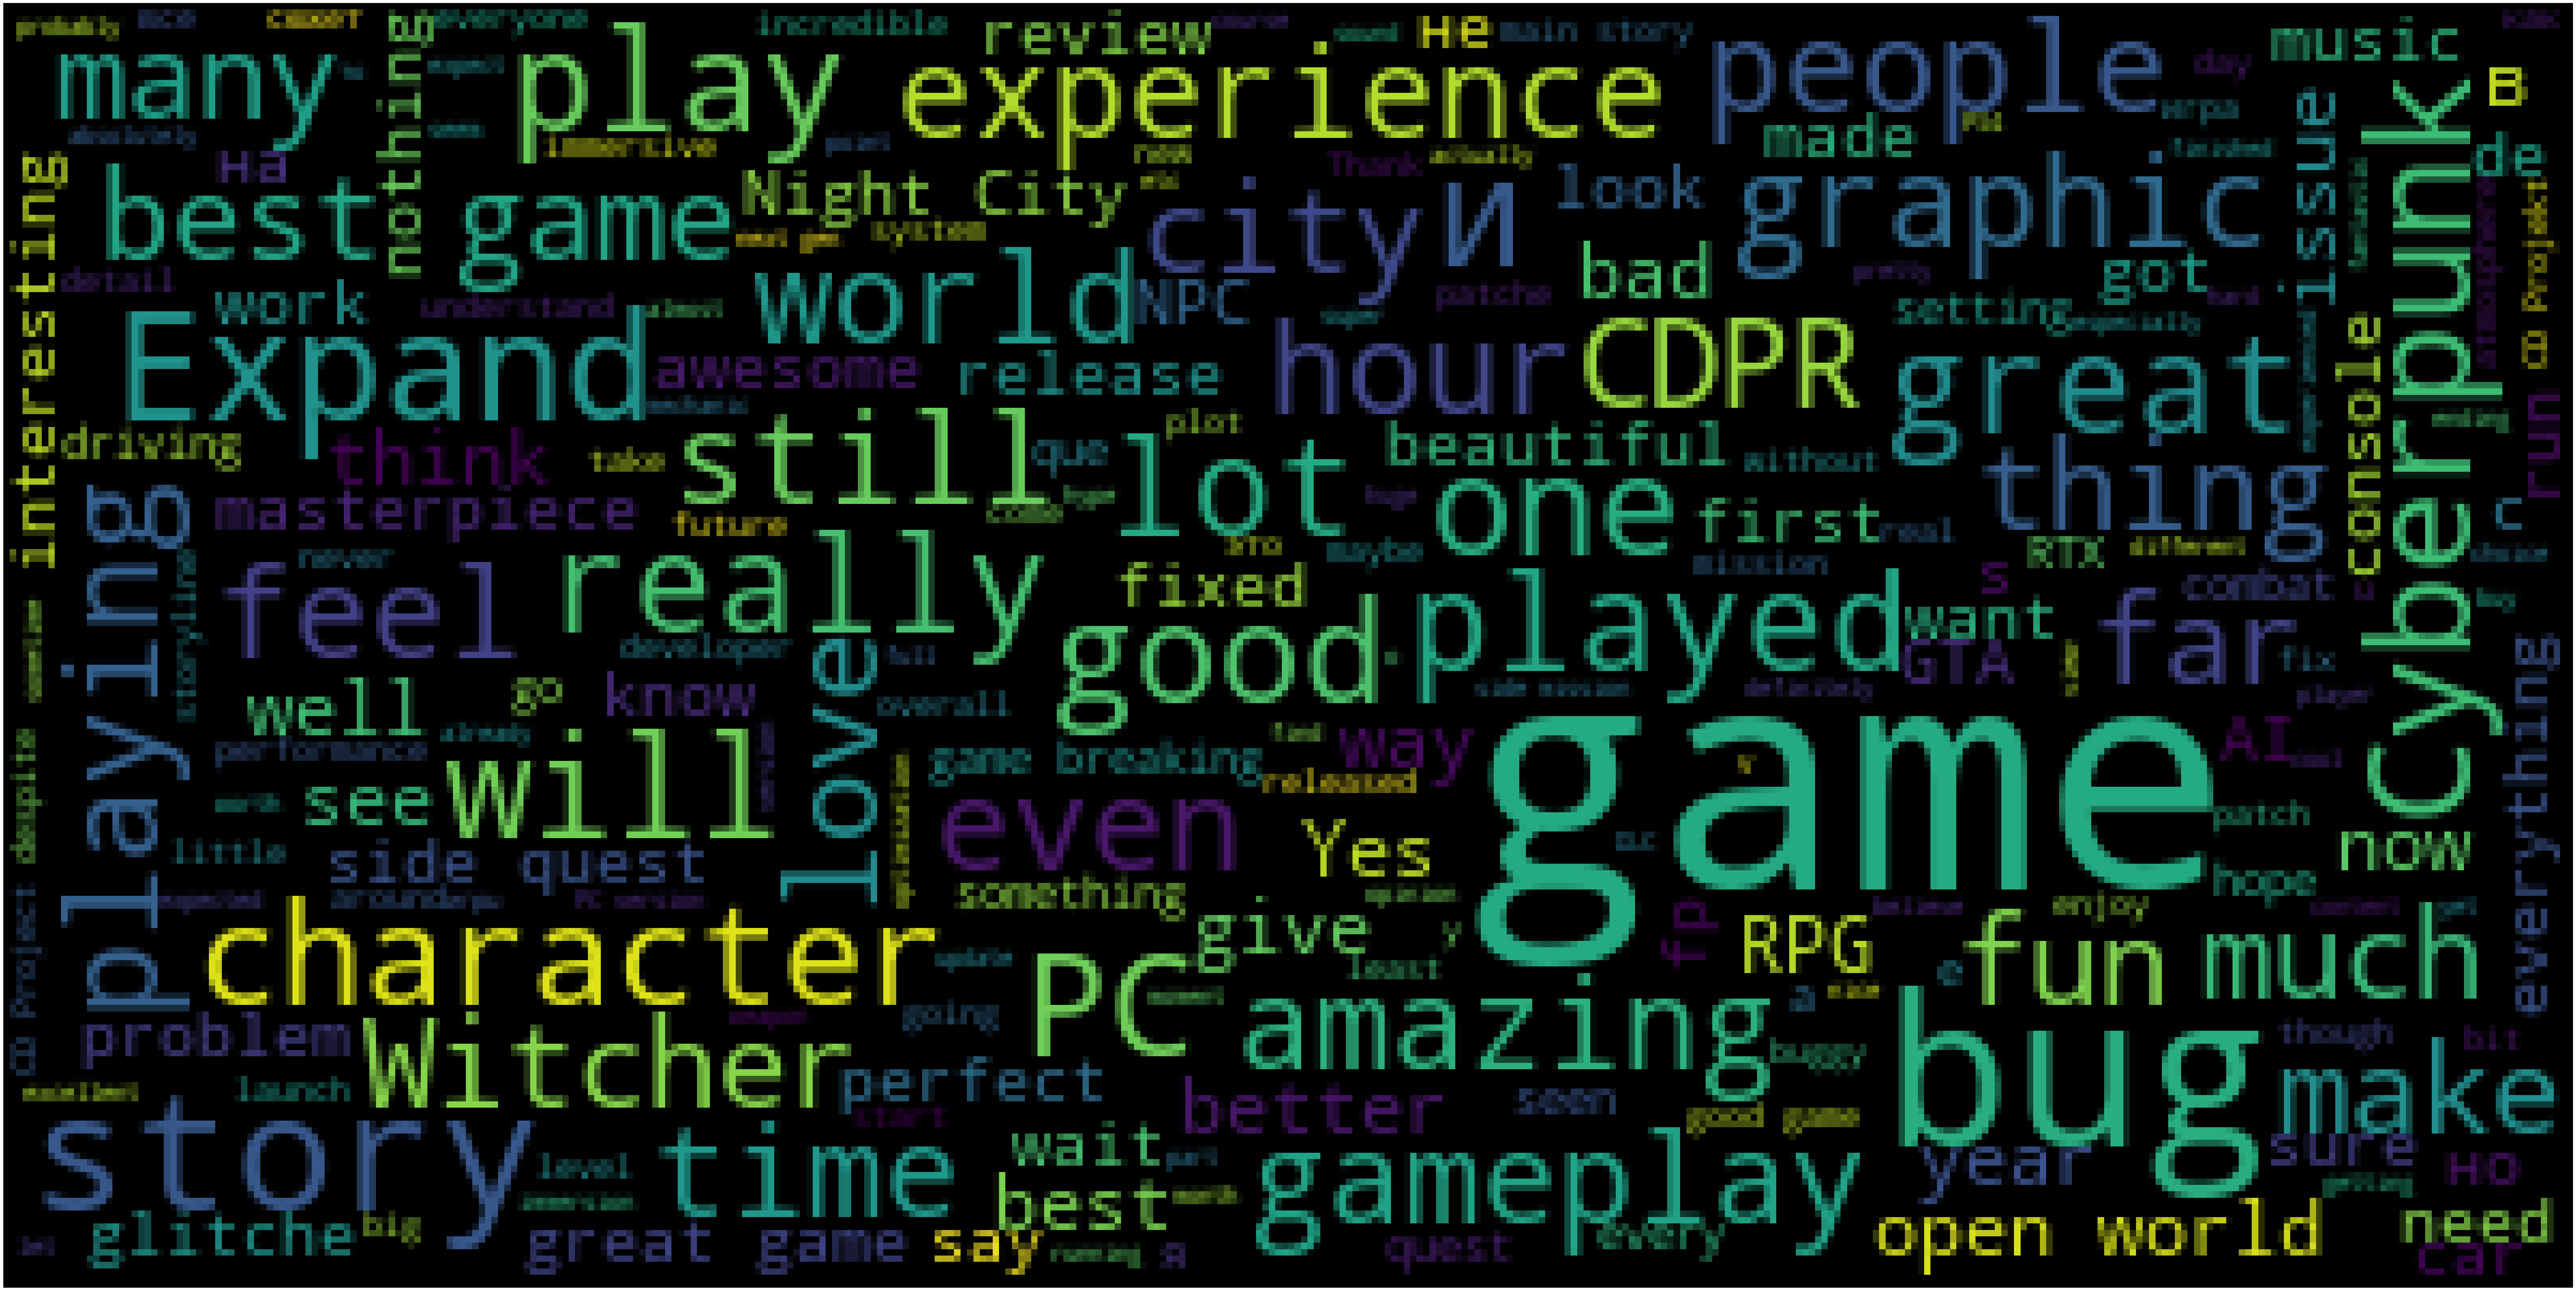

In [5]:

#Analyszing data of positive reviews
positive_reviews=df[df['Rating']>=7]
russian_characters = re.compile(r"[\u0400-\u052F]")
cleaned_reviews = []
print(positive_reviews['Review'])
#Cleaning data so there is only English reviews to analyse
for review in positive_reviews['Review']:
#    cleaned_review = russian_characters.sub("", review)
#    cleaned_reviews.append(cleaned_review)
    try:
        lang = langdetect.detect(review)
    except:
        continue 
    if lang == "en":
      cleaned_reviews.append(review)
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in cleaned_reviews:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#List with the most repeated words
for i in range ( 30 ):
   print(repeated_words[i] )
#Cloud with positive reviews words
word_cloud(positive_reviews['Review'],'black','Most Used Words')